# Assignment 2 Unconstrained Nonlinear Numerical Optimization: Gradient-Based Methods


###   f(x)= 10 x<sub>1</sub><sup>2</sup> + 5 x<sub>1</sub> x<sub>2</sub> + 10 (x<sub>2</sub>  – 3 ) <sup>2</sup>  ;   
###        -10 ≤ x <sub>1</sub>≤ 10, -15 ≤ x<sub>2</sub> ≤ 15;  x = [x<sub>1</sub>,x<sub>2</sub>]<sup>T</suP>.

## Part (a) Gradient Descent Algorithm for a function of two variables

### Using Gradient Descent Algorithm Find the minima of a bi-variate function:

- Allowed to use functions and methods from numpy and matplotlib libraries
- Plot the function in given range using surface plot function with all labels and titles
- Start with initial start point x<sup>(0)</sup> = [10 ,15]<sup>T</sup>
- Take step size parameter (α) = 0.001
- Count number of iterations taken till the convergence is reached
- Convergence is decided by stopping threshold value which is norm of gradient 
- Stopping Threshold value for convergence is 0.001
- Display the minima value and function value after convergence.
- Repeat the process for different step size values: 0.005, 0.01, 0.05
- Prepare the table for step size, number of iterations, minima value and function value at minima

- Analytically verify using close form solution


## Part (b) Line Search Algorithm for a function of two variables
### Using Line Search Algorithm Find the minima of a bi-variate function:

- Allowed to use functions and methods from numpy and matplotlib libraries
- Plot the function in given range using surface plot function with all labels and titles
- Start with initial start point x<sup>(0)</sup> = [10 ,15]<sup>T</sup>, Take γ<sub>1</sub> = 10<sup>-4</sup> and γ<sub>2</sub> = 0.1
- Count number of iterations taken till the convergence is reached
- Convergence is decided by stopping threshold value which is norm of gradient 
- Stopping Threshold value for convergence is 0.001
- Inside main loop assume step size value to be random value between 0 and 1 and verify that it satisfies Wolfe’s conditions to move ahead.
- Display the step size value, x and function value at each iteration.
- Display number of iterations, final value of minima and function value at minima

- Analytically verify using close form solution


## Part (c) Conjugate Gradient Algorithm for a function of four variables
### Using Conjugate Gradient Algorithm Find the minima of a bi-variate function:
####   f(x)= 10 x<sub>1</sub><sup>2</sup> + 5 x<sub>1</sub> x<sub>2</sub> + 10 (x<sub>2</sub>  – 3 ) <sup>2</sup>  ;   
####       -10 ≤ x <sub>1</sub>≤ 10, -15 ≤ x<sub>2</sub> ≤ 15;  x = [x<sub>1</sub>,x<sub>2</sub>,x<sub>3</sub>,x<sub>4</sub>]<sup>T</suP>.

- Allowed to use functions and methods from numpy and matplotlib libraries
- Plot the function in given range using surface plot function with all labels and titles
- Start with initial start point x<sup>(0)</sup>= [10 ,15]<sup>T</sup>
- Count number of iterations taken till the convergence is reached
- Convergence is decided by stopping threshold value which is norm of residuals 
- Stopping Threshold value for convergence is 0.001
- Display the number of iterations, minima value and function value after convergence.

- Analytically verify using close form solution





### Import libraries

In [1]:
# pip install sympy jax matplotlib scipy
# pip install jax jaxlib  ==> only for cpu
# pip install "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html ==> for gpu
# pip install "matplotlib[all]" ==> for full set with all gui support

import sympy as sp
from sympy import N
import jax.numpy as np
import jax
from jax import grad,vjp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import root,minimize_scalar,fsolve
# root : find roots of equations
# minimize_scalar : scalar minimization
# fsolve : numerical root finding

### Defining the Function

In [2]:
# Define the function
# f(x) = 10*x1^2 + 5*x1*x2 + 10*(x2 - 3)^2
# Range: -10 <= x1 <= 10, -15 <= x2 <= 15

In [3]:
def f(x):
    return 10*x[0]**2 + 5*x[0]*x[1] + 10*(x[1] - 3)**2
# Gradient using JAX
grad_f = grad(f)

### Computing Matrix A & b

In [4]:
# Define variables and function
x0, x1 = sp.symbols('x0 x1')
x = sp.Matrix([x0, x1])
fun = 10*x0**2 + 5*x0*x1 + 10*(x1 - 3)**2

# Compute Hessian (A matrix)
A = sp.hessian(fun, x)

# Compute gradient vector
grad_ff = sp.Matrix([fun.diff(var) for var in x])

# Pick a symbolic vector x0 to evaluate at any point (for b)
# Here keep it symbolic, so b remains symbolic
b = grad_ff - A * x

print("Matrix A:")
sp.pprint(A)
print(A)
print("\nVector b (in terms of x):")
sp.pprint(b)
print(b)
print("\nGradient :")
sp.pprint(grad_ff)
print(grad_ff)

Matrix A:
⎡20  5 ⎤
⎢      ⎥
⎣5   20⎦
Matrix([[20, 5], [5, 20]])

Vector b (in terms of x):
⎡ 0 ⎤
⎢   ⎥
⎣-60⎦
Matrix([[0], [-60]])

Gradient :
⎡  20⋅x₀ + 5⋅x₁   ⎤
⎢                 ⎥
⎣5⋅x₀ + 20⋅x₁ - 60⎦
Matrix([[20*x0 + 5*x1], [5*x0 + 20*x1 - 60]])


### Plotting the Graph of given Function with given Constrains

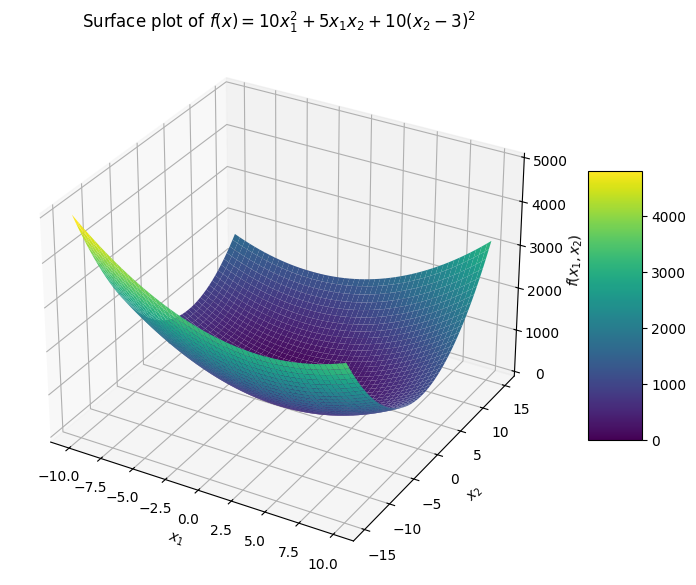

In [5]:
# Create grid
x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-15, 15, 300)
X = np.meshgrid(x1, x2)
X1, X2=X
Z = f(X)

# Plot using surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')

# Labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Surface plot of $f(x) = 10x_1^2 + 5x_1x_2 + 10(x_2 - 3)^2$')

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Steepest (Gradient) Descent Method

In [6]:
# Gradient descent
def gradient_descent(f, grad_f, x0, alpha, tol=1e-3, max_iter=10000):
    x = np.array(x0, dtype=float)
    iterations = 0
    history = [x]

    while np.linalg.norm(grad_f(x)) >= tol and iterations < max_iter:
        x = x - alpha * grad_f(x)
        history.append(x)
        iterations += 1

    return iterations, x, f(x), np.array(history)
# Initial point
x0 = [10.0, 15.0]
a_values = [0.001, 0.01, 0.05, 0.005]
for a in a_values:
    iters, x_min, f_min, history = gradient_descent(f, grad_f, x0, a)
    print(f"alpha={a}, iterations={iters}, x_min={x_min}, f(x)={f_min}")

alpha=0.001, iterations=614, x_min=[-0.8000446  3.200049 ], f(x)=-6.000000953674316
alpha=0.01, iterations=58, x_min=[-0.8000396  3.2000408], f(x)=-6.0
alpha=0.05, iterations=10, x_min=[-0.7999897  3.2000113], f(x)=-5.999999523162842
alpha=0.005, iterations=119, x_min=[-0.80004525  3.200048  ], f(x)=-5.999999046325684


### Steepest (Gradient) Descent Method with Dynamic Step Size 

In [7]:
# Gradient descent with dynamic alpha using line search
def gradient_descent_dynamic(f, grad_f, x0, tol=1e-3, max_iter=1000):
    x = np.array(x0, dtype=float)
    iterations = 0
    history = [x]

    while np.linalg.norm(grad_f(x)) >= tol and iterations < max_iter:
        g = grad_f(x)

        # Line search: find best alpha along -grad direction
        phi = lambda a: f(x - a * g)
        res = minimize_scalar(phi, bounds=(0, 1), method="bounded")  # restrict to [0,1]
        alpha = res.x  # optimal step size

        # Update
        x = x - alpha * g
        history.append({'x':x,'a':alpha})
        iterations += 1

    return iterations, x, alpha, f(x), history

# Run
x0 = [10.0, 15.0]
iters, x_min, alpha, f_min, history = gradient_descent_dynamic(f, grad_f, x0)

print(f"Iterations: {iters}")
print(f"Minimizer: {x_min}")
print(f"f(x_min): {f_min}")
print(f"alpha: {alpha}")

for hist in history:
    print(hist)

Iterations: 4
Minimizer: [-0.7999686  3.2000098]
f(x_min): -6.000000953674316
alpha: 0.055732086300849915
[10. 15.]
{'x': Array([-1.0031166,  3.3967142], dtype=float32), 'a': Array(0.04001133, dtype=float32)}
{'x': Array([-0.7976903,  3.2019677], dtype=float32), 'a': Array(0.06672368, dtype=float32)}
{'x': Array([-0.79998624,  3.1998818 ], dtype=float32), 'a': Array(0.04097625, dtype=float32)}
{'x': Array([-0.7999686,  3.2000098], dtype=float32), 'a': Array(0.05573209, dtype=float32)}


### Line Search Method

In [8]:
def line_search(f, grad_f, x0, tol=1e-3, max_iter=1000, y1=1e-4, y2=0.9):
    x = np.array(x0, dtype=float)
    iterations = 0

    key = jax.random.PRNGKey(42)
    alpha = jax.random.uniform(key, minval=0.0, maxval=1.0)  # random α ∈ (0,1)

    history = [{'x': x, 'alpha': alpha}]
    
    while np.linalg.norm(grad_f(x)) >= tol and iterations < max_iter:
        g = grad_f(x)
        s = -g
                
        # Armijo condition
        lhs1 = f(x + alpha * s)
        rhs1 = f(x) + y1 * alpha * np.dot(g, s)
        Armijo = bool((lhs1 <= rhs1).all())
        
        # Curvature condition
        lhs2 = np.dot(grad_f(x + alpha * s), s)
        rhs2 = y2 * np.dot(g, s)
        Curvature = bool((lhs2 >= rhs2).all())

        if Armijo and Curvature:
            # Accept step
            x = x + alpha * s
            history.append({'iteration': iterations, 'x': x, 'alpha': alpha})
        else:
            # Resample alpha
            key, subkey = jax.random.split(key)
            alpha = jax.random.uniform(subkey, minval=0.0, maxval=1.0)

        iterations += 1

    return iterations, x, alpha, f(x), history

    
x0 = [10.0, 15.0]
iters, x_min, alpha, f_min, history = line_search(f, grad_f, x0)

print(f"Iterations: {iters}")
print(f"Minimizer: {x_min}")
print(f"f(x_min): {f_min}")
print(f"alpha: {alpha}")

for hist in history:
    print(hist)
        

Iterations: 54
Minimizer: [-0.8000263  3.199979 ]
f(x_min): -6.000000953674316
alpha: 0.049353599548339844
{'x': Array([10., 15.], dtype=float32), 'alpha': Array(0.48870957, dtype=float32)}
{'iteration': 45, 'x': Array([-3.5722399 ,  0.68745613], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 46, 'x': Array([-0.21582413,  3.8516178 ], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 47, 'x': Array([-0.9532462,  3.064268 ], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 48, 'x': Array([-0.76848686,  3.2360616 ], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 49, 'x': Array([-0.8084914,  3.19269  ], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 50, 'x': Array([-0.79830587,  3.2020009 ], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration': 51, 'x': Array([-0.8004718,  3.1996078], dtype=float32), 'alpha': Array(0.0493536, dtype=float32)}
{'iteration

### Conjugate Gradient Method

In [9]:
# used SymPY
def conjugate_gradient(f, grad_f, x0, A=A, b=b, tol=1e-3, max_iter=1000):
    iteration = 0
    x = sp.Matrix(x0).reshape(len(x0), 1)   # column vector
    
    r = A * x - b
    d = r
    history = []
    alpha = sp.Rational(0,1)
    beta = sp.Rational(0,1)

    history.append({'iteration': iteration, 'x': x, 'alpha': alpha, 'beta': beta, 'd': d, 'r': r})

    while r.norm() >= tol and iteration < max_iter:
        alpha = (r.T * r)[0] / (d.T * A * d)[0]     # scalar
        x = x + alpha * d
        rn = r - alpha * A * d
        beta = (rn.T * rn)[0] / (r.T * r)[0]
        d = rn + beta * d
        r = rn

        iteration += 1
        history.append({'iteration': iteration, 'x': N(x), 'alpha': N(alpha), 'beta': N(beta), 'd': N(d), 'r': N(r)})

    return iteration, x, f(x), r, d, alpha, beta, history


x0, x1 = sp.symbols('x0 x1')
x = sp.Matrix([x0, x1])
fun = 10*x0**2 + 5*x0*x1 + 10*(x1 - 3)**2
A = sp.hessian(fun, x)
grad_ff = sp.Matrix([fun.diff(var) for var in x])
b = grad_ff - A * x
x0 = [0, 0]
iters, x_min, f_min, r, d, alpha, beta, history = conjugate_gradient(f, grad_f, x0)

print(f"Iterations: {iters}")
print(f"Minimizer: {x_min}")
print(f"Minimizer: {x_min.evalf()}")
print(f"f(x_min): {f_min}")
print(f"r: {r}")
print(f"d: {d}")
print(f"alpha: {alpha}")
print(f"alpha: {alpha.evalf()}")
print(f"beta: {beta}")

from IPython.display import display, Markdown, HTML
# Markdown (LaTeX-style math)
display(Markdown("---"))
for hist in history:
    print(hist)


Iterations: 2
Minimizer: Matrix([[-4/5], [16/5]])
Minimizer: Matrix([[-0.800000000000000], [3.20000000000000]])
f(x_min): -6
r: Matrix([[0], [0]])
d: Matrix([[0], [0]])
alpha: 4/75
alpha: 0.0533333333333333
beta: 0


---

{'iteration': 0, 'x': Matrix([
[0],
[0]]), 'alpha': 0, 'beta': 0, 'd': Matrix([
[ 0],
[60]]), 'r': Matrix([
[ 0],
[60]])}
{'iteration': 1, 'x': Matrix([
[  0],
[3.0]]), 'alpha': 0.0500000000000000, 'beta': 0.0625000000000000, 'd': Matrix([
[-15.0],
[ 3.75]]), 'r': Matrix([
[-15.0],
[    0]])}
{'iteration': 2, 'x': Matrix([
[-0.8],
[ 3.2]]), 'alpha': 0.0533333333333333, 'beta': 0, 'd': Matrix([
[0],
[0]]), 'r': Matrix([
[0],
[0]])}


In [14]:
def gg(x):
    return x[0]*np.exp(x[1])-x[1]*np.exp(x[0])
grad_g=grad(gg)

In [12]:
# Define variables and function
x0, x1 = sp.symbols('x0 x1')
x = sp.Matrix([x0, x1])
fun = x0*sp.exp(x1)- x1*sp.exp(x0)

# Compute Hessian (A matrix)
A = sp.hessian(fun, x)

# Compute gradient vector
grad_ff = sp.Matrix([fun.diff(var) for var in x])

# Pick a symbolic vector x0 to evaluate at any point (for b)
# Here keep it symbolic, so b remains symbolic
b = grad_ff - A * x

print("Matrix A:")
sp.pprint(A)
print(A)
print("\nVector b (in terms of x):")
sp.pprint(b)
print(b)
print("\nGradient :")
sp.pprint(grad_ff)
print(grad_ff)

Matrix A:
⎡       x₀       x₀    x₁⎤
⎢  -x₁⋅ℯ      - ℯ   + ℯ  ⎥
⎢                        ⎥
⎢   x₀    x₁        x₁   ⎥
⎣- ℯ   + ℯ      x₀⋅ℯ     ⎦
Matrix([[-x1*exp(x0), -exp(x0) + exp(x1)], [-exp(x0) + exp(x1), x0*exp(x1)]])

Vector b (in terms of x):
⎡        x₀      ⎛   x₀    x₁⎞       x₀    x₁ ⎤
⎢ x₀⋅x₁⋅ℯ   - x₁⋅⎝- ℯ   + ℯ  ⎠ - x₁⋅ℯ   + ℯ   ⎥
⎢                                             ⎥
⎢         x₁      ⎛   x₀    x₁⎞       x₁    x₀⎥
⎣- x₀⋅x₁⋅ℯ   - x₀⋅⎝- ℯ   + ℯ  ⎠ + x₀⋅ℯ   - ℯ  ⎦
Matrix([[x0*x1*exp(x0) - x1*(-exp(x0) + exp(x1)) - x1*exp(x0) + exp(x1)], [-x0*x1*exp(x1) - x0*(-exp(x0) + exp(x1)) + x0*exp(x1) - exp(x0)]])

Gradient :
⎡      x₀    x₁⎤
⎢- x₁⋅ℯ   + ℯ  ⎥
⎢              ⎥
⎢     x₁    x₀ ⎥
⎣ x₀⋅ℯ   - ℯ   ⎦
Matrix([[-x1*exp(x0) + exp(x1)], [x0*exp(x1) - exp(x0)]])


In [26]:
def line_search(gg, grad_g, x0, tol=0.005, max_iter=1000, y1=1e-4, y2=0.9):
    x = np.array(x0, dtype=float)
    iterations = 0

    key = jax.random.PRNGKey(42)
    alpha = 0.01#jax.random.uniform(key, minval=0.0, maxval=1.0)  # random α ∈ (0,1)

    history = [{'x': x, 'alpha': alpha}]
    
    while np.linalg.norm(grad_g(x)) >= tol and iterations < max_iter:
        g = grad_g(x)
        s = -g
                
        # Armijo condition
        lhs1 = f(x + alpha * s)
        rhs1 = f(x) + y1 * alpha * np.dot(g, s)
        Armijo = bool((lhs1 <= rhs1).all())
        
        # Curvature condition
        lhs2 = np.dot(grad_g(x + alpha * s), s)
        rhs2 = y2 * np.dot(g, s)
        Curvature = bool((lhs2 >= rhs2).all())

        if Armijo and Curvature:
            # Accept step
            x = x + alpha * s
            history.append({'iteration': iterations, 'x': x, 'alpha': alpha})
        else:
            # Resample alpha
            key, subkey = jax.random.split(key)
            alpha = jax.random.uniform(subkey, minval=0.0, maxval=1.0)

        iterations += 1

    return iterations, x, alpha, gg(x), history

    
x0 = [10.0, 10.0]
iters, x_min, alpha, f_min, history = line_search(gg, grad_g, x0)

print(f"Iterations: {iters}")
print(f"Minimizer: {x_min}")
print(f"f(x_min): {f_min}")
print(f"alpha: {alpha}")

for hist in history:
    print(hist)
        

Iterations: 1000
Minimizer: [10. 10.]
f(x_min): 0.0
alpha: 0.14505159854888916
{'x': Array([10., 10.], dtype=float32), 'alpha': 0.01}


In [27]:
def gx(x):
    return x[0]*np.exp(x[1])-x[1]*np.exp(x[0])
grad_gx=grad(gx)

In [ ]:
def line_search(gx, grad_gx, x0, tol=0.05, max_iter=1000, y1=1e-4, y2=0.9):
    x = np.array(x0, dtype=float)
    iterations = 0

    key = jax.random.PRNGKey(42)
    alpha = 0.01#jax.random.uniform(key, minval=0.0, maxval=1.0)  # random α ∈ (0,1)

    history = [{'x': x, 'alpha': alpha}]
    
    while np.linalg.norm(grad_gx(x)) >= tol and iterations < max_iter:
        g = grad_gx(x)
        s = -g
                
        # Armijo condition
        lhs1 = f(x + alpha * s)
        rhs1 = f(x) + y1 * alpha * np.dot(g, s)
        Armijo = bool((lhs1 <= rhs1).all())
        
        # Curvature condition
        lhs2 = np.dot(grad_gx(x + alpha * s), s)
        rhs2 = y2 * np.dot(g, s)
        Curvature = bool((lhs2 >= rhs2).all())

        if Armijo and Curvature:
            # Accept step
            x = x + alpha * s
            history.append({'iteration': iterations, 'x': x, 'alpha': alpha})
        else:
            # Resample alpha
            key, subkey = jax.random.split(key)
            alpha = jax.random.uniform(subkey, minval=0.0, maxval=1.0)

        iterations += 1

    return iterations, x, alpha, gg(x), history

    
x0 = [10.0, 10.0]
iters, x_min, alpha, f_min, history = line_search(gx, grad_gx, x0)

print(f"Iterations: {iters}")
print(f"Minimizer: {x_min}")
print(f"f(x_min): {f_min}")
print(f"alpha: {alpha}")

for hist in history:
    print(hist)
        